In [1]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import numpy.ma as ma

In [127]:
def fog_filter(band,topo,height,hbt,lbt):
    out=ma.masked_where(topo<=height, topo)
    #print(out.shape)
    cloud_mask=np.zeros((250,201))
    for i in range(1,249):
        for j in range(1,200):
            if out[i+1,j]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1

            if out[i+1,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i+1,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1    
    return cloud_mask

In [104]:
def read_hua(day):
    filename=glob.glob('test_sounding/202002'+day+'00.csv')
    s20200208=open(filename[0])
    csvreader = csv.reader(s20200208) 
    header = []
    header = next(csvreader)
    header
    rows = []
    for row in csvreader:
        rows.append(row)
    hua=np.zeros((40,3))
    for j in range(0,40):
        data=rows[j]
        hua[j,0]=float(data[3])
        if hua[j,0]>=8000:
            break
        hua[j,1]=float(data[4])
        hua[j,2]=float(data[8])
    name=filename[0]
    hr=name[22:24]
    return hua,hr 

In [4]:
x = np.arange(85.01,205.01,0.02)
y = np.arange(-59.99,60.01,0.02)
local_lon=x[1700:1901]
local_lat=y[4050:4300]
print(local_lon.shape)
#print(band13.shape)
hi_lon=x[1675:2175]
hi_lat=y[4050:4300]

(201,)


In [5]:
with open('topo_regrid_2km.pkl', 'rb') as f:
    topo = pickle.load(f)

In [6]:
##Ishigaki island
s20200208=open('47918.20200208_00.csv')
csvreader = csv.reader(s20200208)
header = []
header = next(csvreader)
header
rows = []
for row in csvreader:
        rows.append(row)
s0208=np.zeros((20,3))
for i in range(0,20):
 data=rows[i]
 print(data[2],data[3],data[5])
 s0208[i,0]=float(data[2])
 s0208[i,1]=float(data[3])
 s0208[i,2]=float(data[5])

7.0 18.0 60.0
24.0 17.0 48.0
202.0 16.0 59.0
858.0 10.0 80.0
1047.0 8.5 85.0
1555.0 4.6 99.0
1661.0 4.4 99.0
1671.0 4.4 99.0
1848.0 8.2 61.0
1929.0 11.0 54.0
2001.0 10.5 53.0
2660.0 5.6 45.0
3142.0 0.8 59.0
3315.0 -0.8 63.0
3374.0 -1.3 64.0
3721.0 0.0 17.0
3746.0 1.2 11.0
3883.0 1.0 9.0
4244.0 2.0 4.0
4322.0 1.6 4.0


In [122]:
##花蓮
h20200208=open('test_sounding/2020022300.csv')
csvreader = csv.reader(h20200208)
header = []
header = next(csvreader)
header
rows = []
for row in csvreader:
        rows.append(row)
h0208=np.zeros((20,3))
for i in range(0,20):
 data=rows[i]
 print(data[3],data[4],data[8])
 h0208[i,0]=float(data[3])
 h0208[i,1]=float(data[4])
 h0208[i,2]=float(data[8])

19.0 18.4 89.0
236.0 18.0 78.0
306.0 17.6 76.0
384.0 17.3 75.0
898.0 13.0 98.0
918.0 12.8 100.0
983.0 12.5 100.0
1085.0 12.0 100.0
1466.0 10.6 100.0
1606.0 10.0 100.0
1882.0 8.6 100.0
2725.0 4.3 91.0
2978.0 2.2 100.0
3199.0 1.0 100.0
3242.0 0.7 95.0
3277.0 5.1 32.0
3295.0 6.7 18.0
3305.0 7.0 12.0
3431.0 9.1 6.0
3714.0 6.7 16.0


In [121]:
print('Ishigaki')
print(s0208[s0208[:,2]>90,:])
print('Hualien')
print(h0208[h0208[:,2]>90,:])

Ishigaki
[[1555.     4.6   99. ]
 [1661.     4.4   99. ]
 [1671.     4.4   99. ]]
Hualien
[[8.980e+02 1.300e+01 9.800e+01]
 [9.180e+02 1.280e+01 1.000e+02]
 [9.830e+02 1.250e+01 1.000e+02]
 [1.085e+03 1.200e+01 1.000e+02]
 [1.466e+03 1.060e+01 1.000e+02]
 [1.606e+03 1.000e+01 1.000e+02]
 [1.882e+03 8.600e+00 1.000e+02]
 [2.725e+03 4.300e+00 9.100e+01]
 [2.978e+03 2.200e+00 1.000e+02]
 [3.199e+03 1.000e+00 1.000e+02]
 [3.242e+03 7.000e-01 9.500e+01]]


(array([ 45.,  44.,  62., 149., 118., 113., 111., 111.,  96., 178., 250.,
        207., 182., 193., 201., 198., 169., 189., 280., 330., 472., 387.,
        377., 416., 433., 409., 318., 350., 323., 299., 273., 290., 178.,
        185., 138., 153., 161., 148., 161., 123., 119., 122.,  96., 114.,
        119., 101.,  90.,  77.,  44.,  49.,  10.,  18.,  11.,   0.]),
 array([265. , 265.5, 266. , 266.5, 267. , 267.5, 268. , 268.5, 269. ,
        269.5, 270. , 270.5, 271. , 271.5, 272. , 272.5, 273. , 273.5,
        274. , 274.5, 275. , 275.5, 276. , 276.5, 277. , 277.5, 278. ,
        278.5, 279. , 279.5, 280. , 280.5, 281. , 281.5, 282. , 282.5,
        283. , 283.5, 284. , 284.5, 285. , 285.5, 286. , 286.5, 287. ,
        287.5, 288. , 288.5, 289. , 289.5, 290. , 290.5, 291. , 291.5,
        292. ]),
 <a list of 54 Patch objects>)

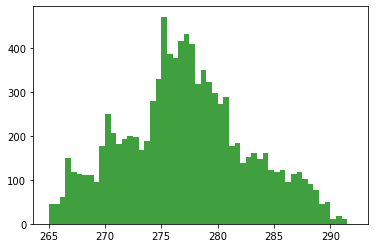

In [17]:
plt.hist(ishi_band13, bins=bins, facecolor='g', alpha=0.75)

day 01
[2040.]
271.0
day 02
[1857.]
276.0
day 03
[ 914. 2320.]
275.0
day 04
[ 432. 2457.]
276.0
day 05
[2649.]
275.0
day 06
[2665.]
272.0
day 07
[1063. 1395. 3533.]
282.0


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\jerry\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


day 08
[2138.]
276.0
day 09
[2719. 3583.]
273.0
day 10
[2421.]
276.0
day 11
[7537.]
241.0
day 12
[3837.]
279.0
day 13
[ 481. 2182. 4180.]
283.0
day 14
[1625.]
284.0


<ipython-input-129-753dcf9945ed>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,8))


day 15
[ 824. 2058.]
284.0
day 16
[2138.]
282.0
day 17
[2051. 4348.]
276.0
day 18
[2441.]
269.0
day 19
[1229. 2212.]
273.0
day 20
[2104.]
276.0
day 21
[1694. 2483.]
273.0
day 23
[3242.]
274.0
day 24
[2539.]
278.0
day 25
[1495.]
278.0
day 26
[3449.]
276.0
day 27
[2815.]
280.0
day 28
[1704. 2962.]
282.0
day 29
[3336.]
276.0


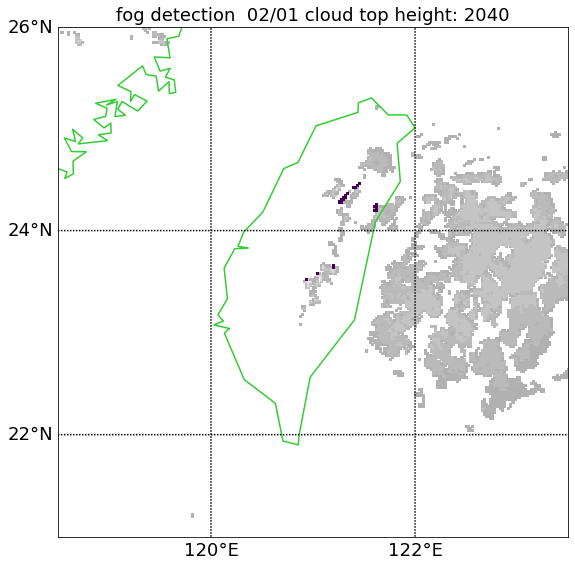

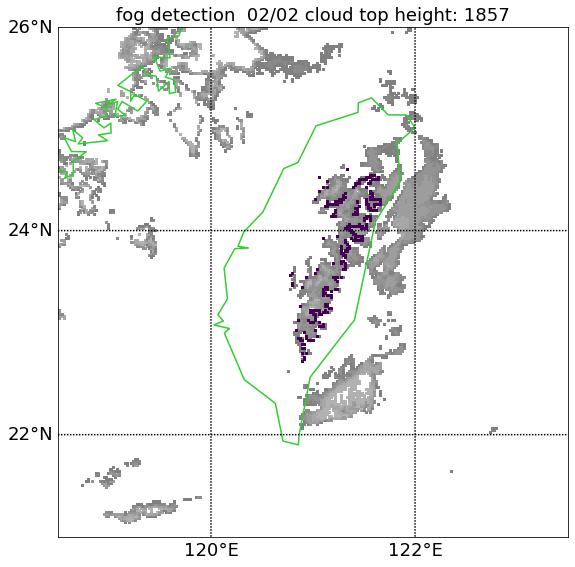

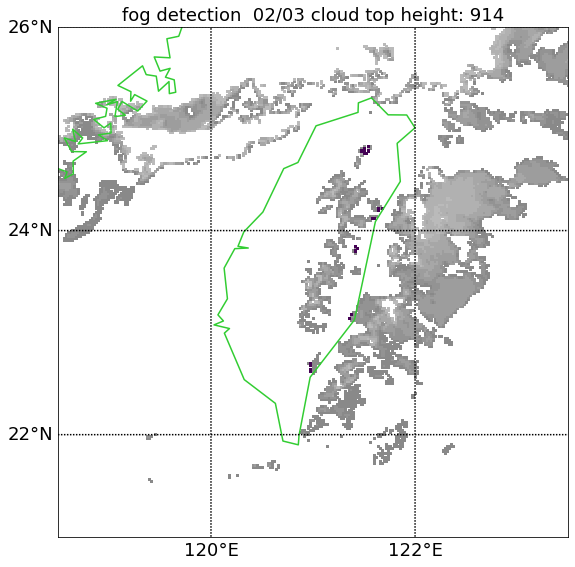

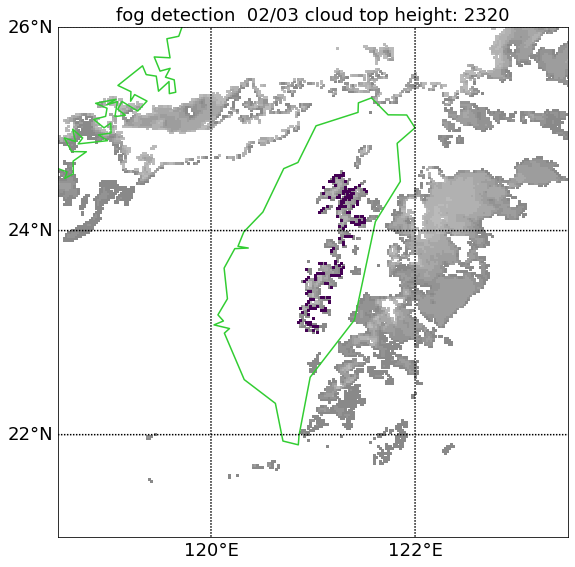

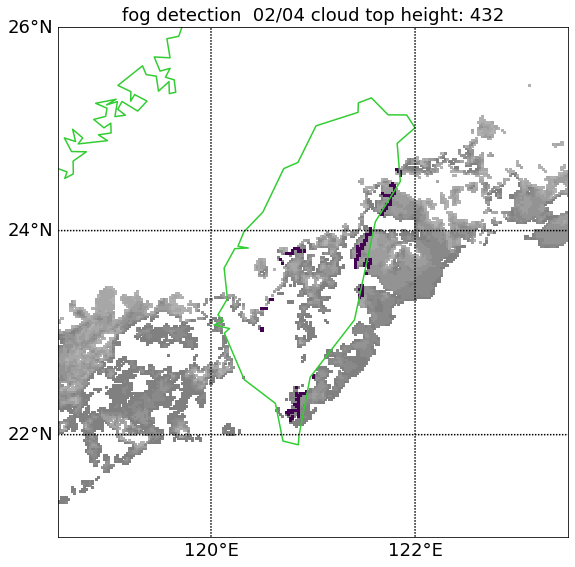

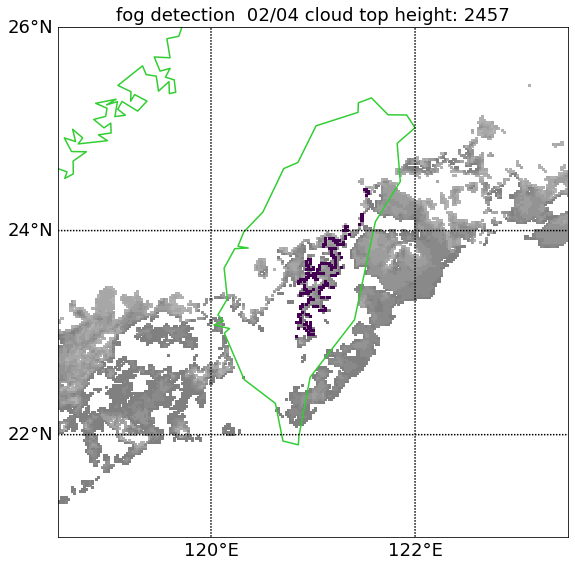

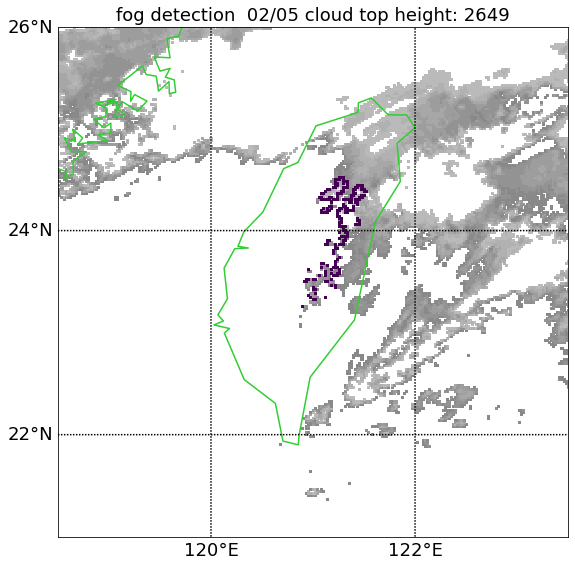

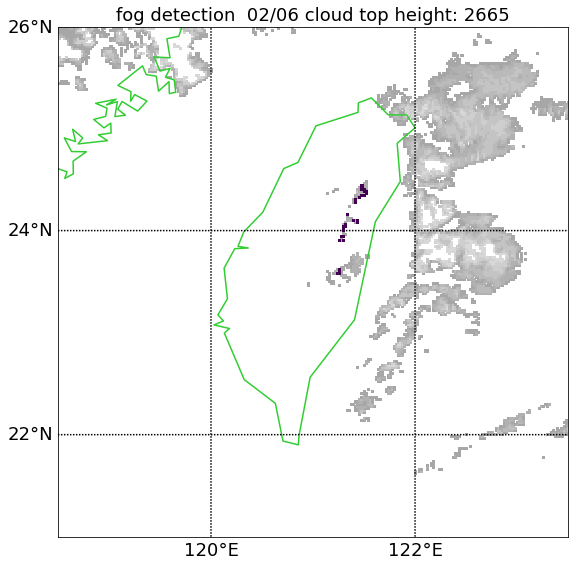

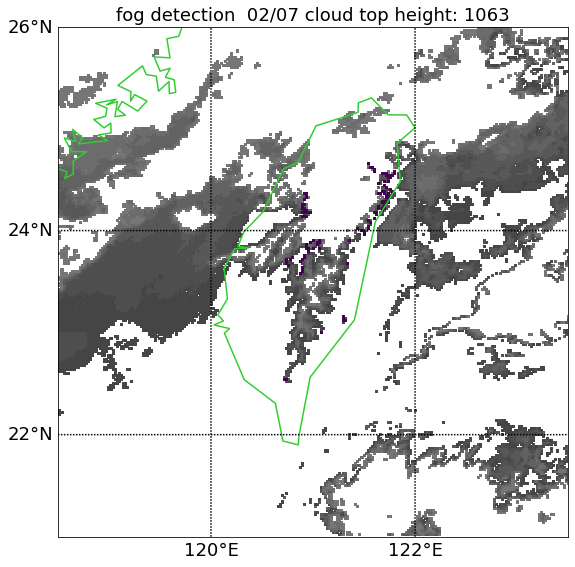

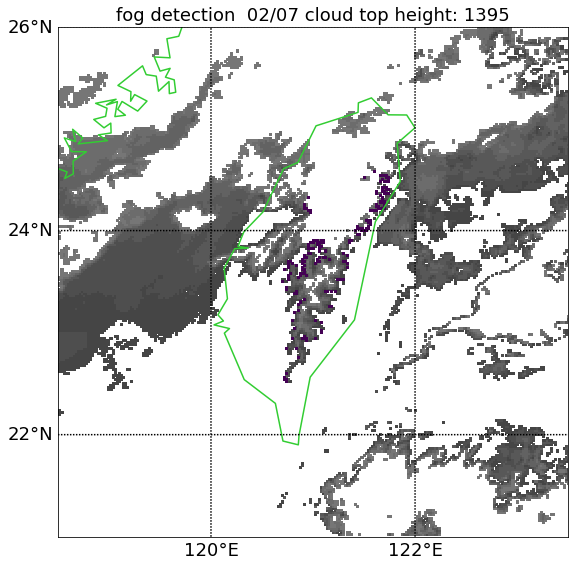

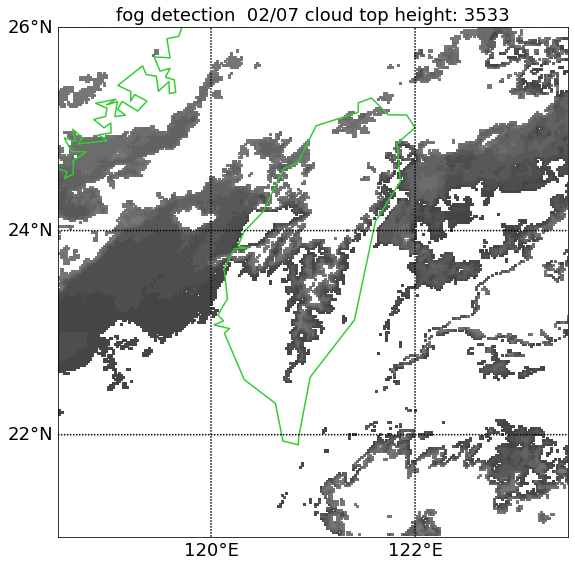

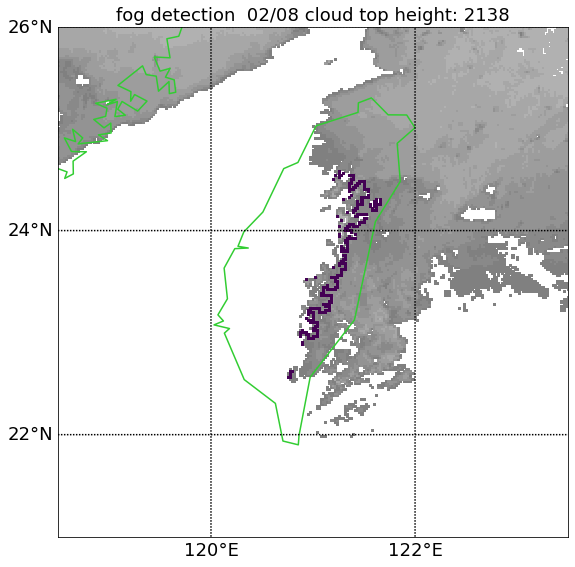

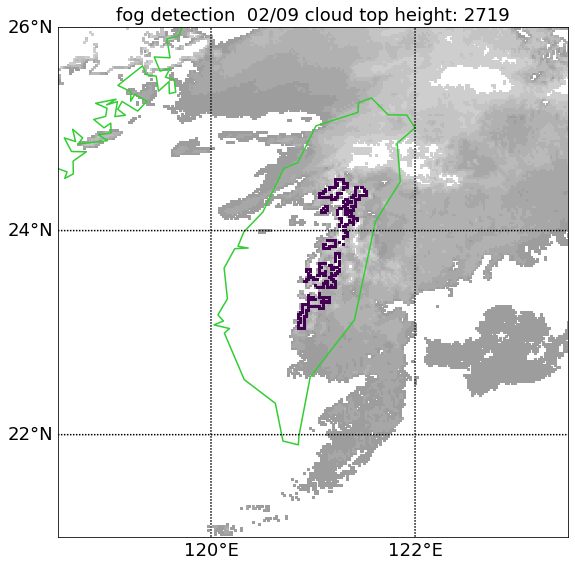

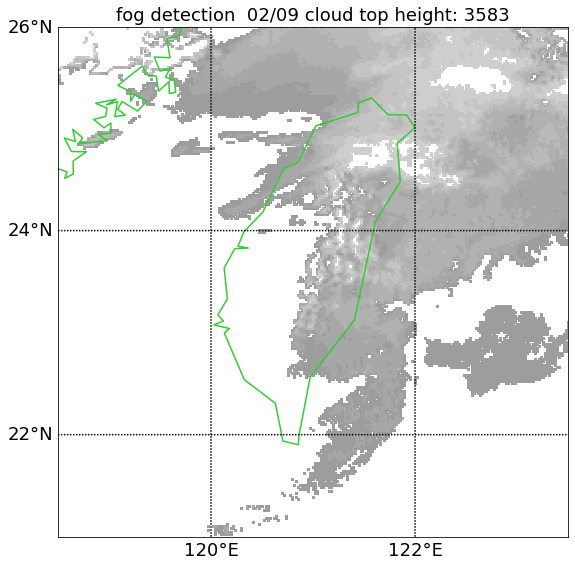

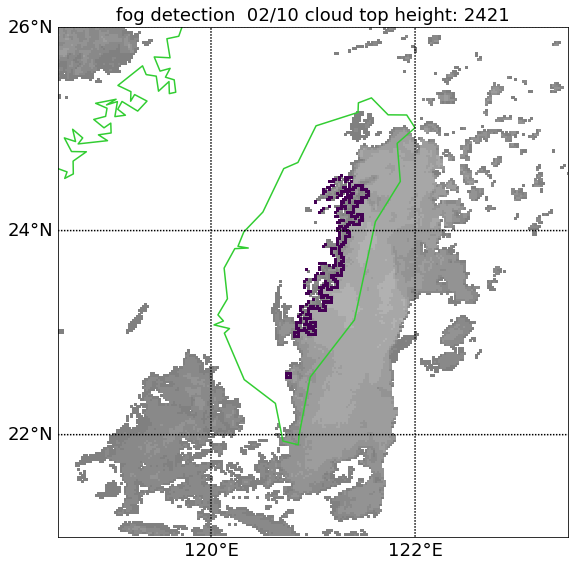

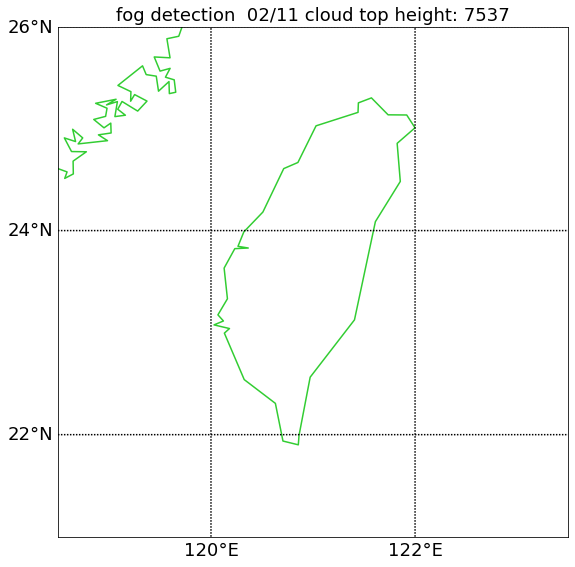

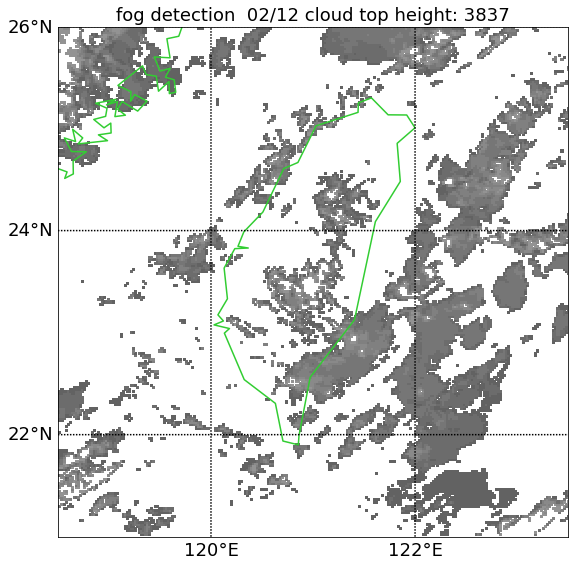

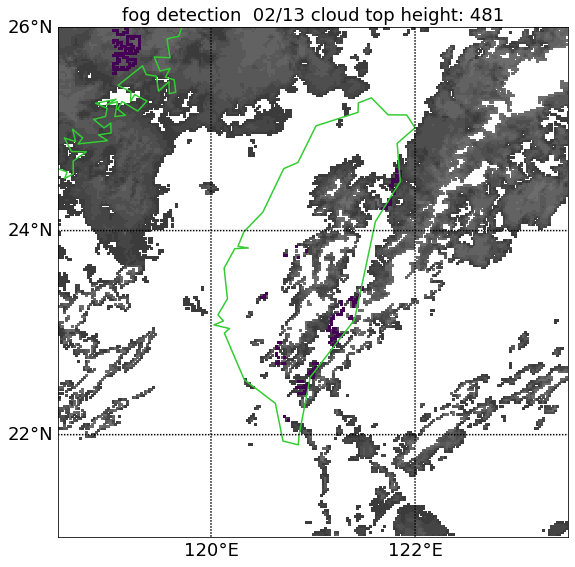

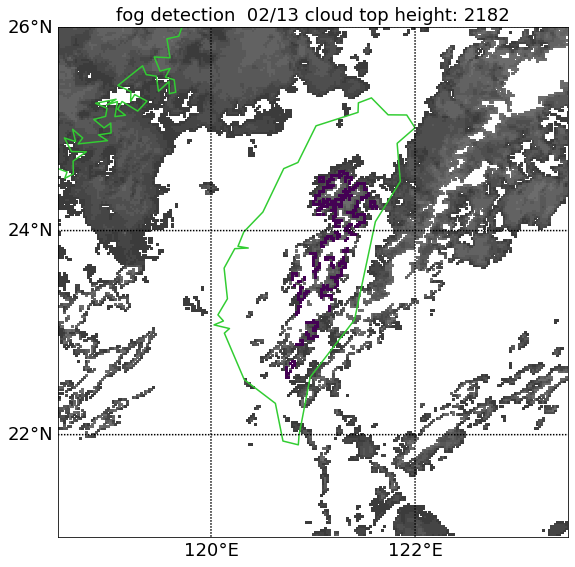

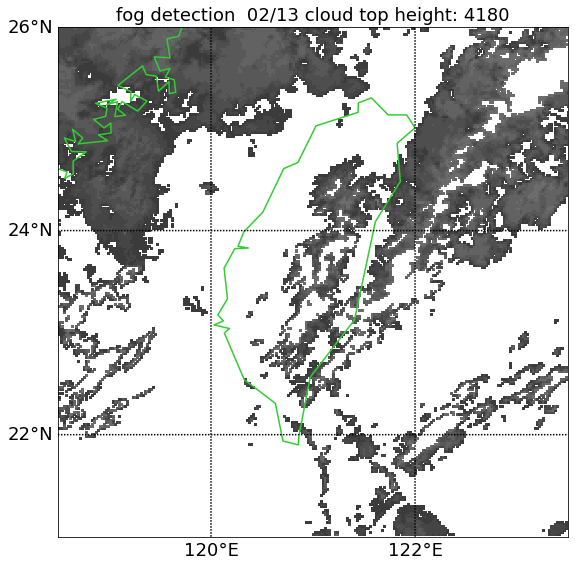

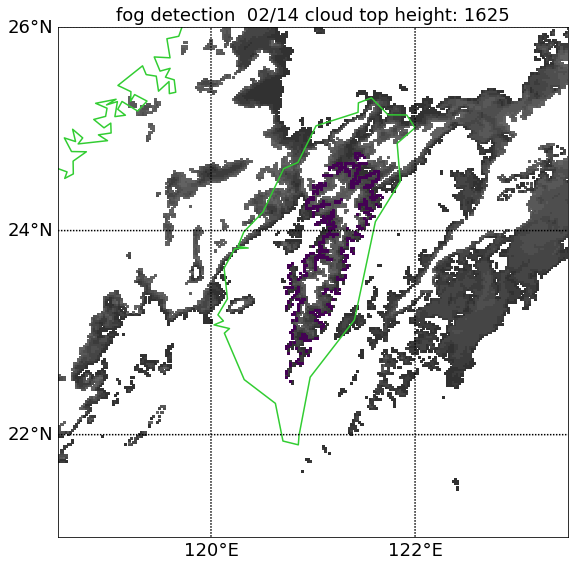

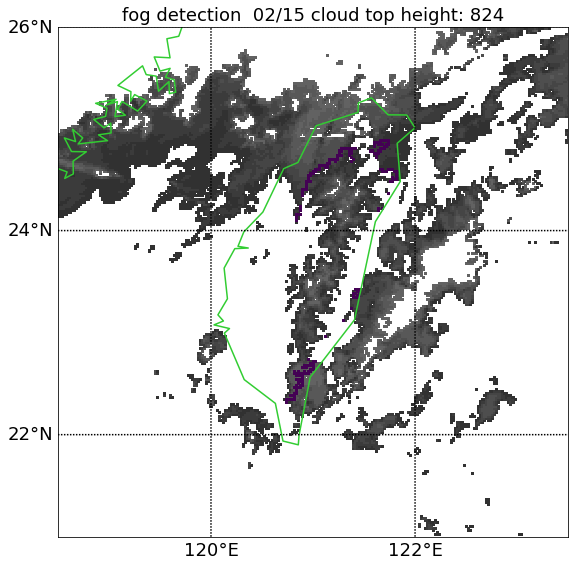

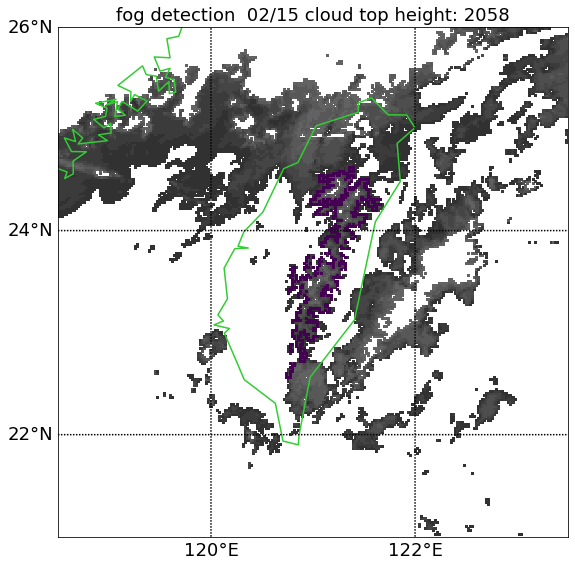

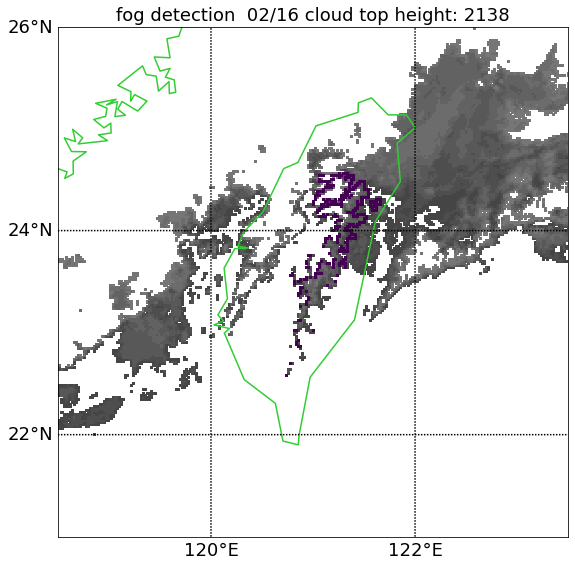

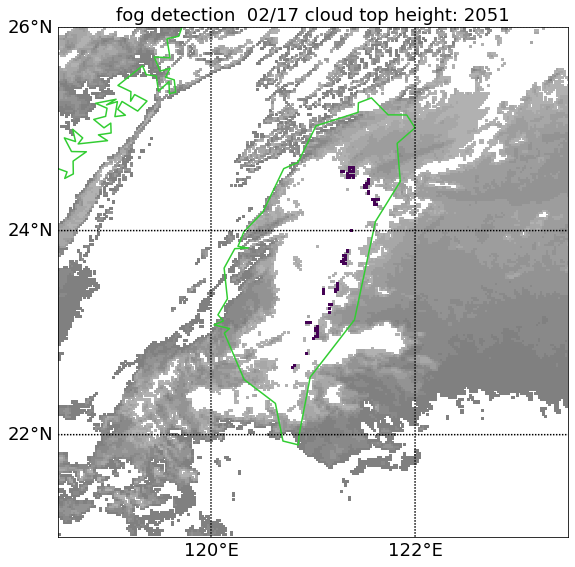

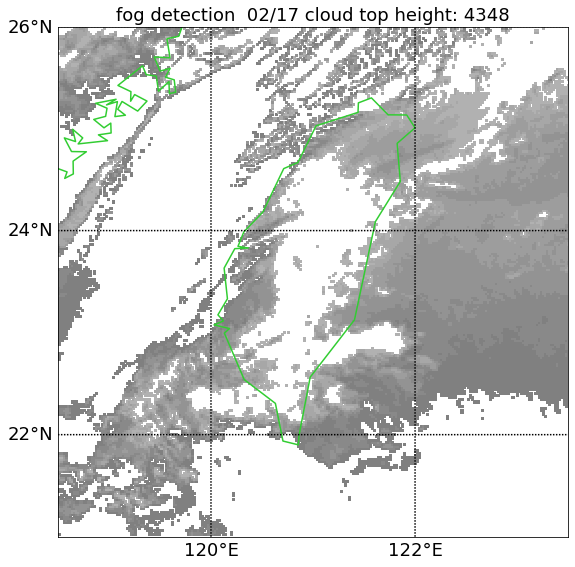

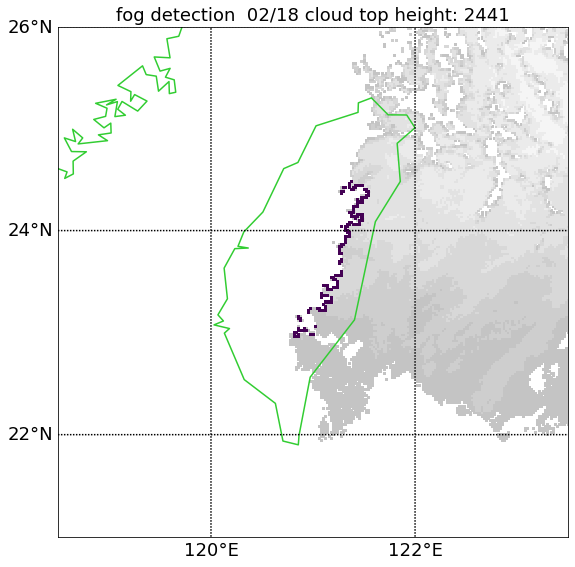

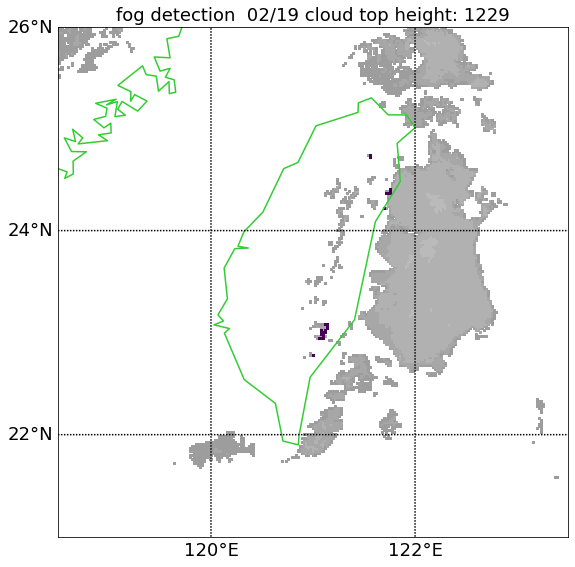

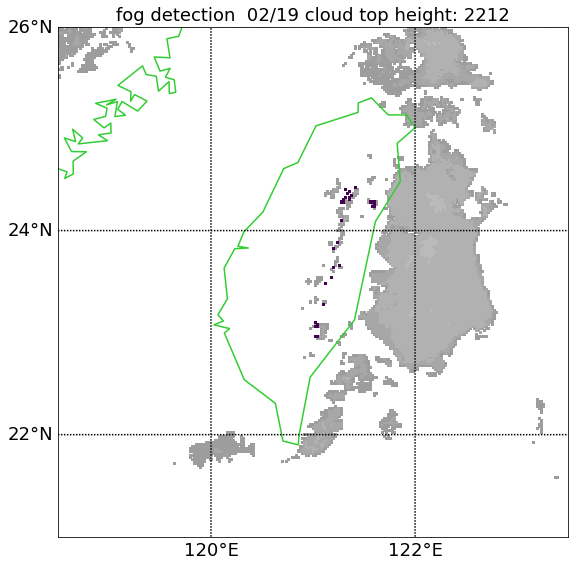

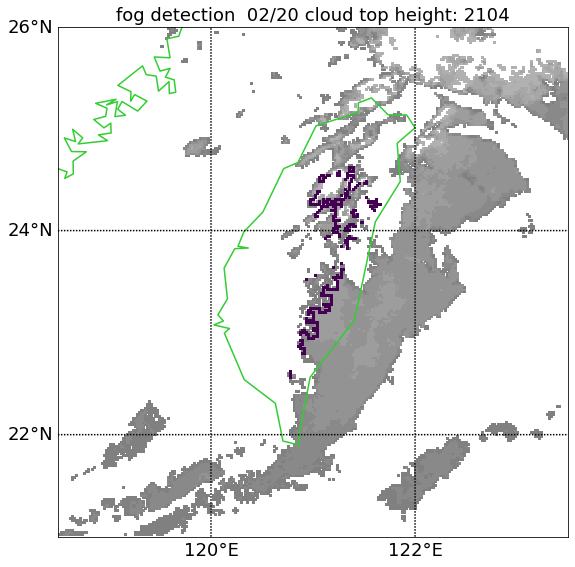

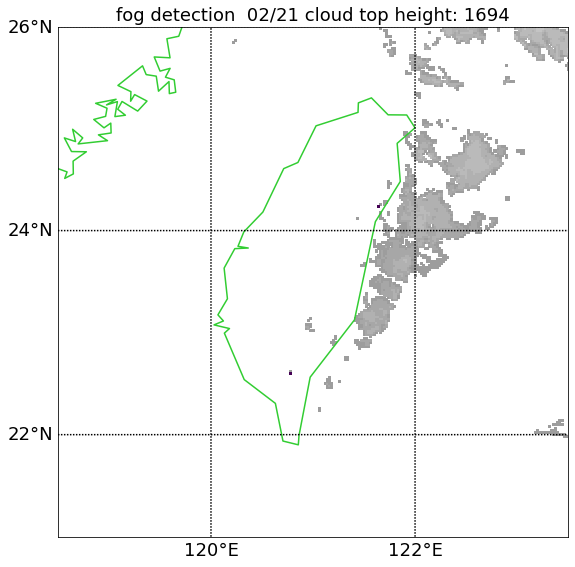

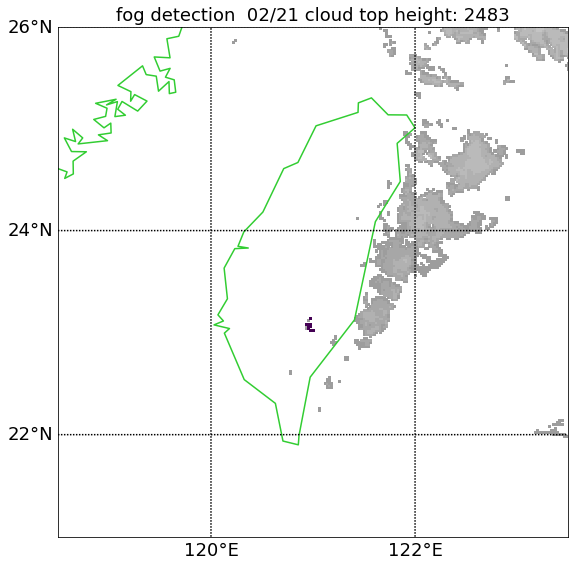

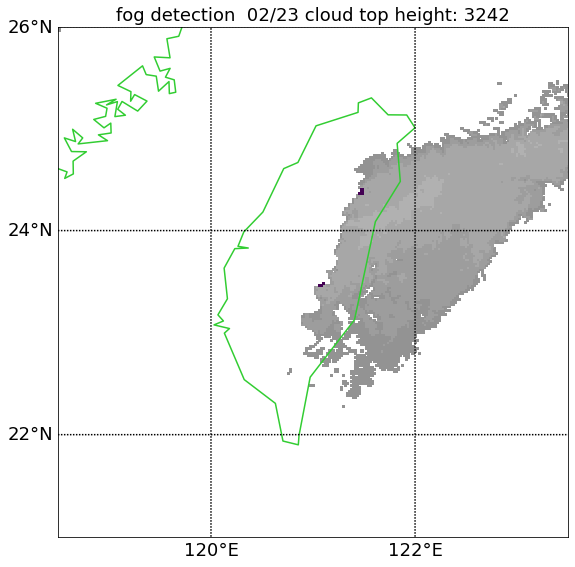

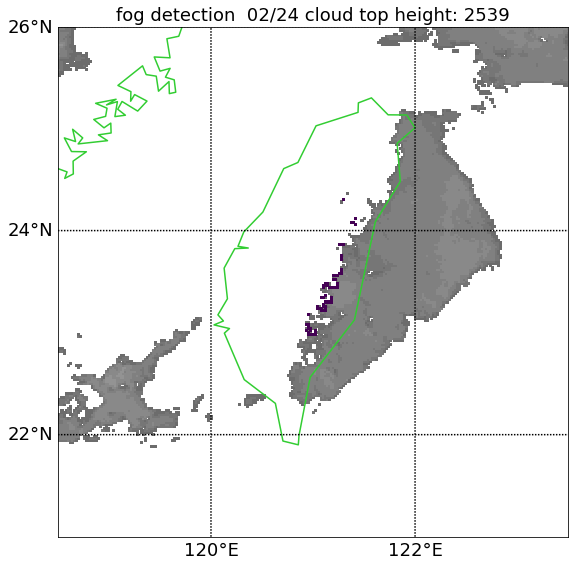

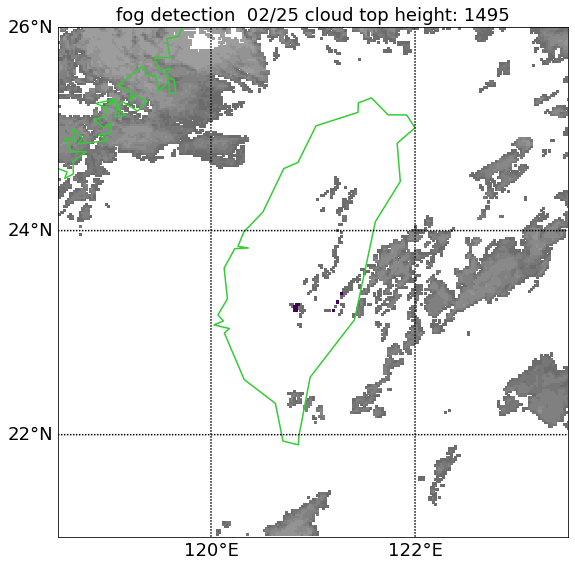

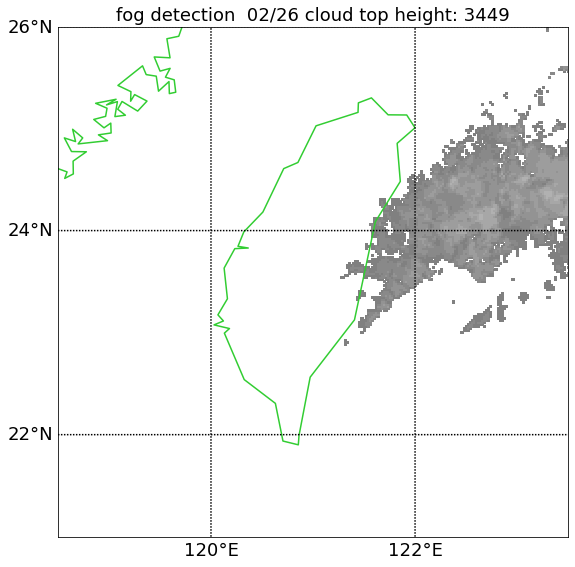

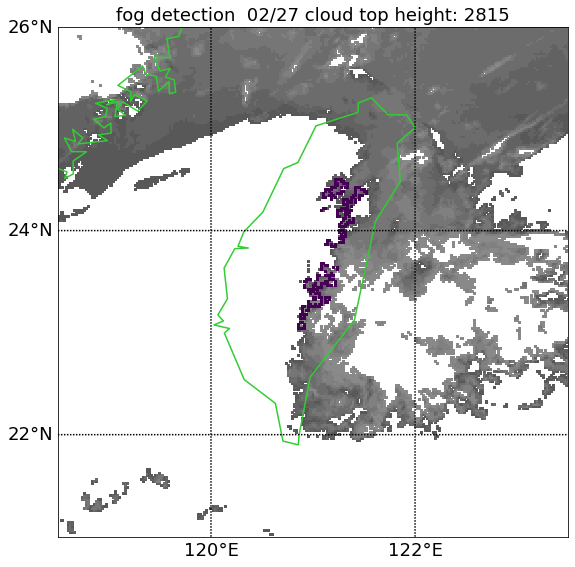

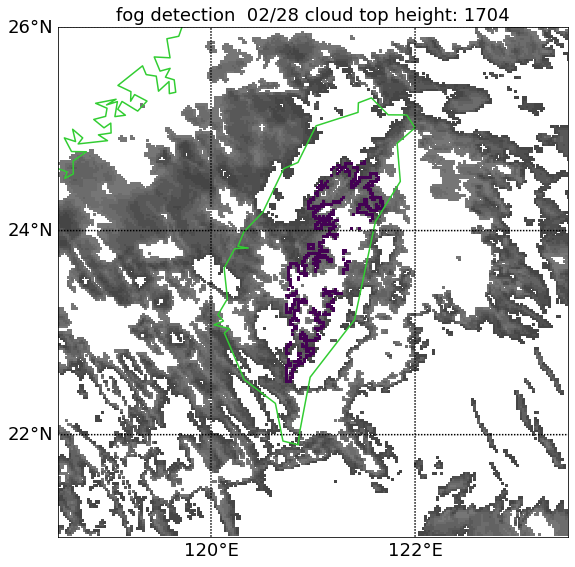

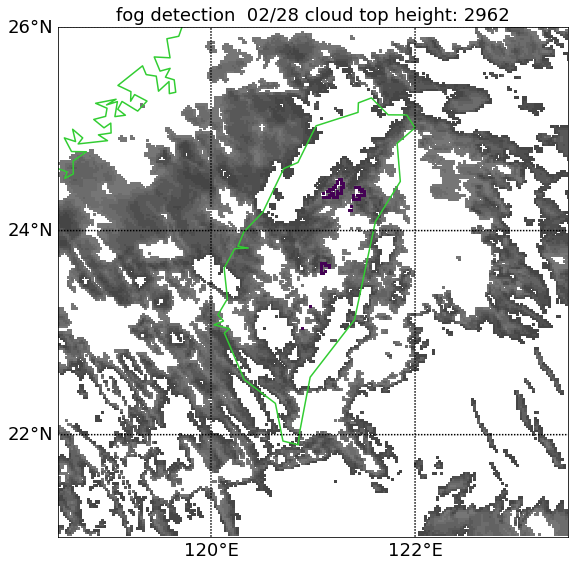

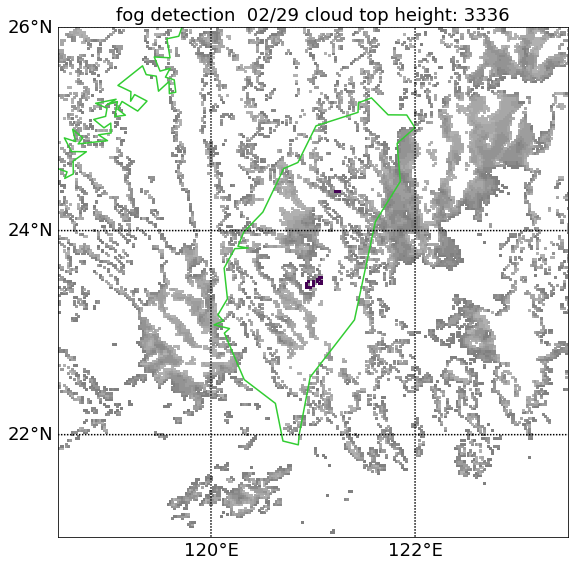

In [129]:
for i in range(0,29):
    day=str(i+1)
    if i <9:
        day='0'+day
    #print('day',day)
    hua, hr = read_hua(day)
#### find cloud and cloud top
    cloudtop=hua[hua[:,2]>=90,:]
    if np.size(cloudtop>0):
        print('day',day)
        topwhere=np.where(hua[:,2]>=90)
        cloudlocate=topwhere[0]
        toplocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if cloudlocate[k+1]-cloudlocate[k]>1.1:
                toplocate.append(cloudlocate[k])
        toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        print(hua[toplocate,0])
####
####
        fileband=glob.glob('test/test_band13_202002'+day+str(hr)+'00.pkl')
        #print(fileband)
        with open(fileband[0], 'rb') as f:
            band13= pickle.load(f)
        tw_band13=band13[:,25:226]
        ishi_band13=band13[100:201,180:281].flatten()
        bins=np.arange(265,292.1,0.5)
####find cloud tb
        may_cloud=np.where(ishi_band13>285,0, ishi_band13)
#print(type(may_cloud))
        aa=np.floor(may_cloud)
#print(aa[1000:1200])
        vals,counts = np.unique(aa[aa>0], return_counts=True)
        index = np.argmax(counts)
        most=vals[index]
        print(most)
        #plt.hist(ishi_band13, bins=bins, facecolor='g', alpha=0.75)
        for kk in range(0,np.size(toplocate)):
            height=hua[toplocate[kk],0]
            #print(height)
            hi_bt=most+3
            lo_bt=most-3
            cloud_mask=fog_filter(tw_band13,topo,height,hi_bt,lo_bt)
            fig = plt.figure(figsize=(8,8)) 
            m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
            m.drawcoastlines(linewidth=1.5,color='limegreen')
            m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
            m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

            cmap2 = cm.get_cmap("gray_r",lut=27)
            cmap2.set_under("white")
            cmap2.set_over("k")
            out1=ma.masked_where(band13>most+3, band13)
            out=ma.masked_where(out1<most-3, out1)
            m.pcolormesh(hi_lon,hi_lat,out,cmap=cmap2,vmin=265,vmax=292)
            out=ma.masked_where(cloud_mask<0.5, cloud_mask)
            m.pcolormesh(local_lon,local_lat,out)
            plt.title('fog detection  02/' + day + ' cloud top height: '+str(int(height))+'',fontsize=18)
            plt.tight_layout()
            plt.savefig('hua_hi_02_' + day + '_'+str(int(height))+'.png',dpi=300)

In [35]:
for i in range(10,11):
 day=str(i+1)
 #print('day',day)
 if i <9:
  day='0'+day
 filename=glob.glob('test_sounding/47918.202002'+day+'_*.csv')
 s20200208=open(filename[0])
 csvreader = csv.reader(s20200208) 
 header = []
 header = next(csvreader)
 header
 rows = []
 for row in csvreader:
  rows.append(row)
 ishigaki=np.zeros((20,3))
 for i in range(0,20):
  data=rows[i]
  ishigaki[i,0]=float(data[2])
  if ishigaki[i,0]>=8000:
   break
  ishigaki[i,1]=float(data[3])
  ishigaki[i,2]=float(data[5])
  #print(data[2],data[3],data[5])
 #print(day)
 cloudtop=ishigaki[ishigaki[:,2]>=90,:]
 if cloudtop[:,0].size>0 and max(cloudtop[:,0]>200):
  print('day    ',day)
  print(max(cloudtop[:,0]))

day     01
1745.0
284.0
day     05
2352.0
275.0
day     08
1671.0
276.0
day     09
1983.0
274.0
day     13
2246.0
282.0
day     16
1408.0
280.0
day     17
1976.0
276.0
day     18
1912.0
272.0
day     19
2161.0
273.0
day     23
1553.0
279.0
day     27
953.0
281.0
day     29
3118.0
276.0


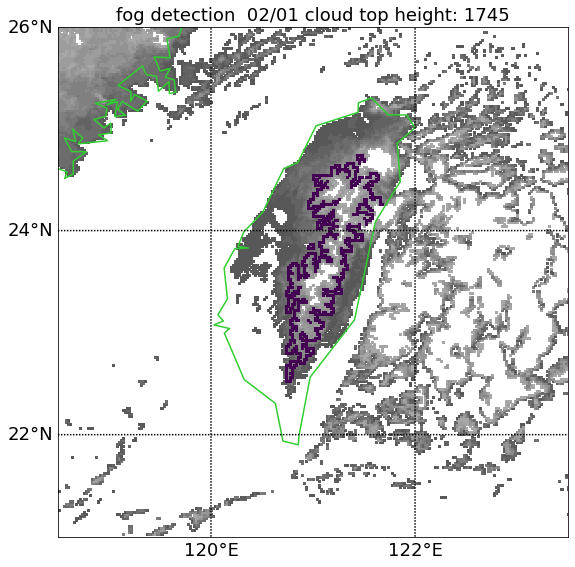

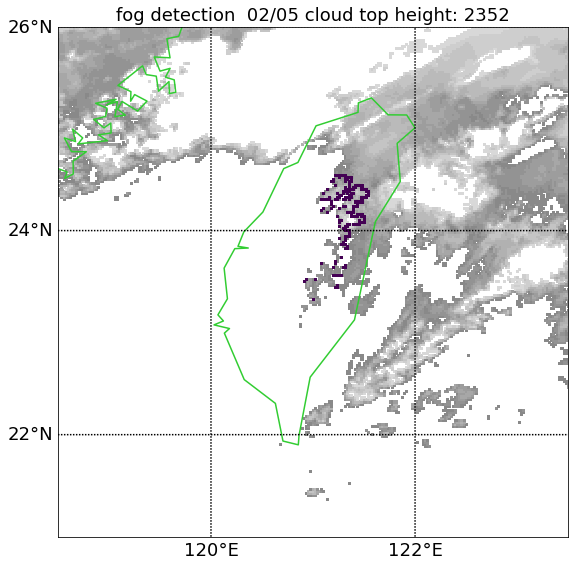

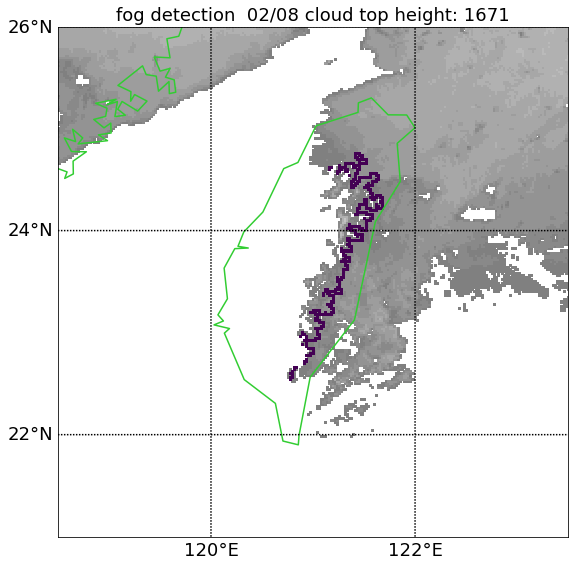

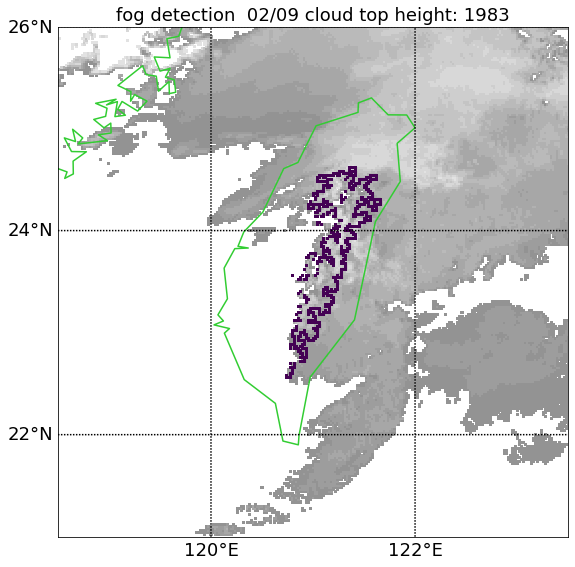

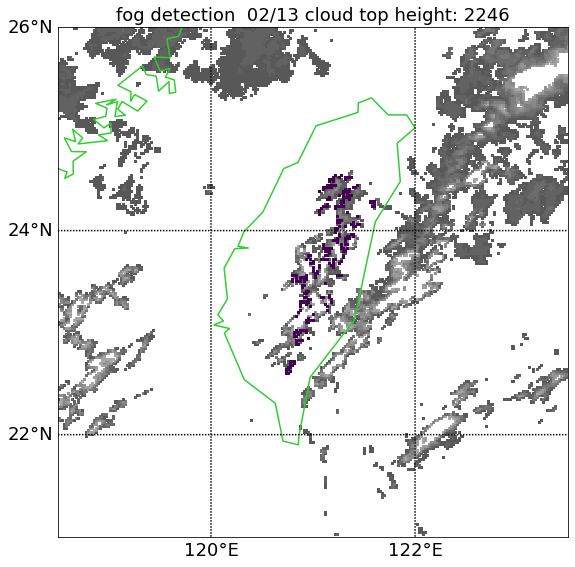

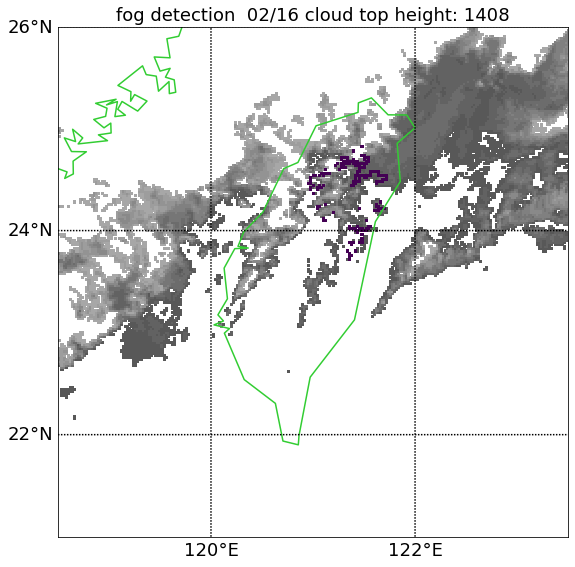

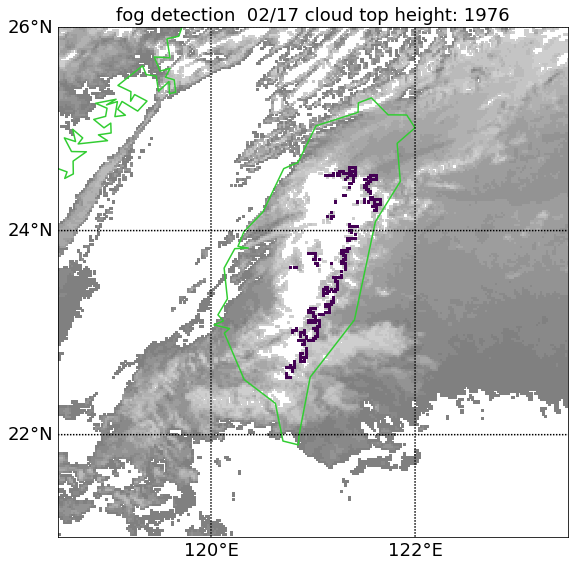

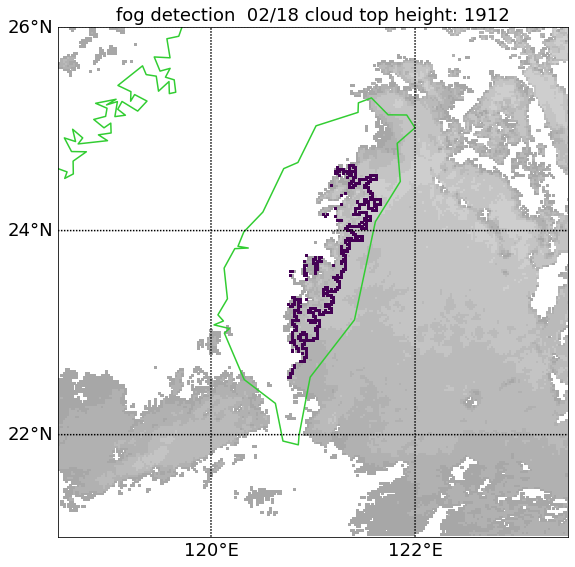

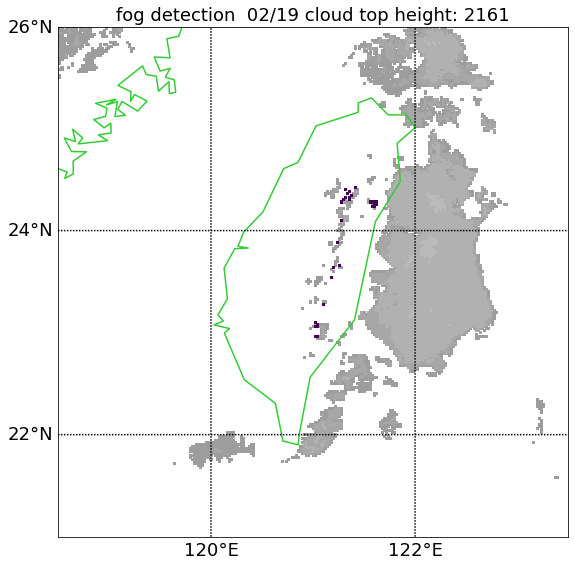

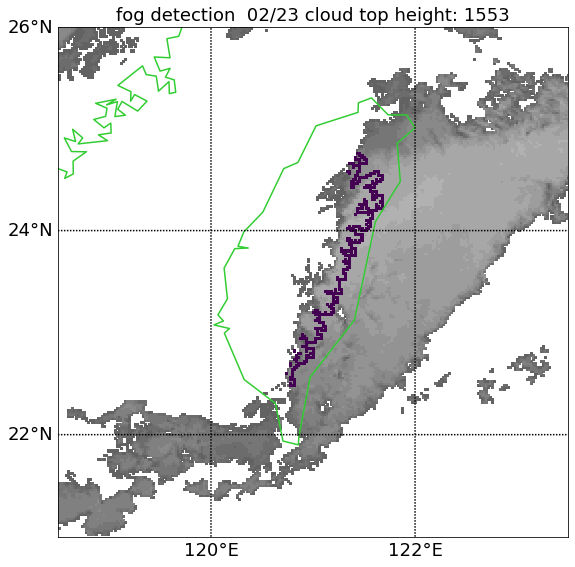

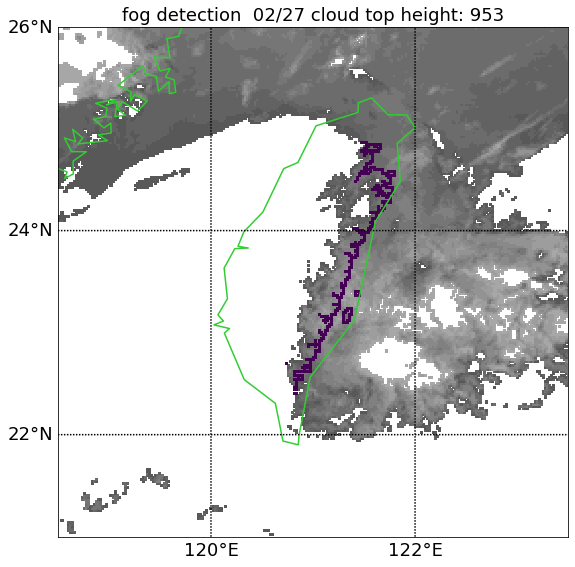

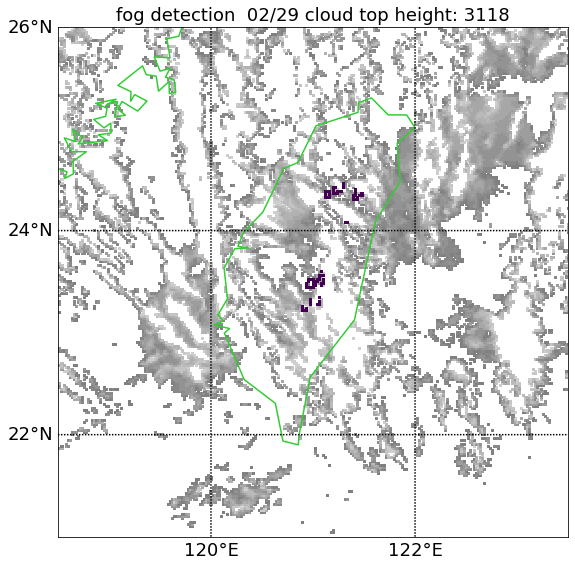

In [131]:
for i in range(0,29):
 day=str(i+1)
 #print('day',day)
 if i <9:
  day='0'+day
 filename=glob.glob('test_sounding/47918.202002'+day+'_*.csv')
 s20200208=open(filename[0])
 csvreader = csv.reader(s20200208) 
 header = []
 header = next(csvreader)
 header
 rows = []
 for row in csvreader:
  rows.append(row)
 ishigaki=np.zeros((20,3))
 for j in range(0,20):
  data=rows[j]
  ishigaki[j,0]=float(data[2])
  if ishigaki[j,0]>=8000:
   break
  ishigaki[j,1]=float(data[3])
  ishigaki[j,2]=float(data[5])
  #print(data[2],data[3],data[5])
 #print(day)
 cloudtop=ishigaki[ishigaki[:,2]>=90,:]
 if cloudtop[:,0].size>0 and max(cloudtop[:,0]>200):
  print('day    ',day)
  print(max(cloudtop[:,0]))
  name=filename[0]
  hr=name[29:31]
####read data
  fileband=glob.glob('test/test_band13_202002'+day+str(hr)+'00.pkl')
  with open(fileband[0], 'rb') as f:
      band13= pickle.load(f)
  tw_band13=band13[:,25:226]
  ishi_band13=band13[120:221,235:336].flatten()
  bins=np.arange(265,292.1,0.5)
####find cloud tb
  may_cloud=np.where(ishi_band13>285,0, ishi_band13)
#print(type(may_cloud))
  aa=np.floor(may_cloud)
#print(aa[1000:1200])
  vals,counts = np.unique(aa[aa>0], return_counts=True)
  index = np.argmax(counts)
  most=vals[index]
  print(most)
  if most >=280:
    most=280
  #plt.hist(ishi_band13, bins=bins, facecolor='g', alpha=0.75)
  height=max(cloudtop[:,0])
  hi_bt=most+3
  lo_bt=most-6
  cloud_mask=fog_filter(tw_band13,topo,height,hi_bt,lo_bt)
  fig = plt.figure(figsize=(8,8)) 
  m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
  m.drawcoastlines(linewidth=1.5,color='limegreen')
  m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
  m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

  cmap2 = cm.get_cmap("gray_r",lut=27)
  cmap2.set_under("white")
  cmap2.set_over("k")
  out1=ma.masked_where(band13>most+3, band13)
  out=ma.masked_where(out1<most-6, out1)
  m.pcolormesh(hi_lon,hi_lat,out,cmap=cmap2,vmin=265,vmax=292)

  out=ma.masked_where(cloud_mask<0.5, cloud_mask)
  m.pcolormesh(local_lon,local_lat,out)
  plt.title('fog detection  02/' + day + ' cloud top height: '+str(int(height))+'',fontsize=18)
  plt.tight_layout()
  plt.savefig('ishi_hi_02_' + day + '.png',dpi=300)

In [36]:
name=filename[0]
hr=name[29:31]
fileband=glob.glob('test/test_band13_202002'+day+str(hr)+'00.pkl')
with open(fileband[0], 'rb') as f:
    band13= pickle.load(f)

In [37]:
print(hi_lon[180:281])
print(hi_lat[100:201])

[122.11 122.13 122.15 122.17 122.19 122.21 122.23 122.25 122.27 122.29
 122.31 122.33 122.35 122.37 122.39 122.41 122.43 122.45 122.47 122.49
 122.51 122.53 122.55 122.57 122.59 122.61 122.63 122.65 122.67 122.69
 122.71 122.73 122.75 122.77 122.79 122.81 122.83 122.85 122.87 122.89
 122.91 122.93 122.95 122.97 122.99 123.01 123.03 123.05 123.07 123.09
 123.11 123.13 123.15 123.17 123.19 123.21 123.23 123.25 123.27 123.29
 123.31 123.33 123.35 123.37 123.39 123.41 123.43 123.45 123.47 123.49
 123.51 123.53 123.55 123.57 123.59 123.61 123.63 123.65 123.67 123.69
 123.71 123.73 123.75 123.77 123.79 123.81 123.83 123.85 123.87 123.89
 123.91 123.93 123.95 123.97 123.99 124.01 124.03 124.05 124.07 124.09
 124.11]
[23.01 23.03 23.05 23.07 23.09 23.11 23.13 23.15 23.17 23.19 23.21 23.23
 23.25 23.27 23.29 23.31 23.33 23.35 23.37 23.39 23.41 23.43 23.45 23.47
 23.49 23.51 23.53 23.55 23.57 23.59 23.61 23.63 23.65 23.67 23.69 23.71
 23.73 23.75 23.77 23.79 23.81 23.83 23.85 23.87 23.89 23.91 2

In [38]:
#ishi_band13=band13[145:196,260:311].flatten()
tw_band13=band13[:,25:226]
ishi_band13=band13[120:221,235:336].flatten()
print(ishi_band13.shape)
bins=np.arange(265,292.1,0.5)

(10201,)


In [39]:
may_cloud=np.where(ishi_band13>285,0, ishi_band13)
#print(type(may_cloud))
aa=np.floor(may_cloud)
#print(aa[1000:1200])
vals,counts = np.unique(aa[aa>0], return_counts=True)
index = np.argmax(counts)
most=vals[index]
print(most)
if most >=280:
    most=280

284.0


(array([100., 104., 124., 109., 102.,  97.,  95., 116., 101., 132., 126.,
        116., 139., 135., 126., 133., 125., 133., 153., 156., 121., 179.,
        155., 121., 137., 134., 127., 130., 129., 156., 149., 136., 117.,
        146., 154., 157., 179., 141., 173., 184., 157., 167., 175., 182.,
        154., 182., 146., 122., 115., 152., 133., 111.,  46.,   3.]),
 array([265. , 265.5, 266. , 266.5, 267. , 267.5, 268. , 268.5, 269. ,
        269.5, 270. , 270.5, 271. , 271.5, 272. , 272.5, 273. , 273.5,
        274. , 274.5, 275. , 275.5, 276. , 276.5, 277. , 277.5, 278. ,
        278.5, 279. , 279.5, 280. , 280.5, 281. , 281.5, 282. , 282.5,
        283. , 283.5, 284. , 284.5, 285. , 285.5, 286. , 286.5, 287. ,
        287.5, 288. , 288.5, 289. , 289.5, 290. , 290.5, 291. , 291.5,
        292. ]),
 <a list of 54 Patch objects>)

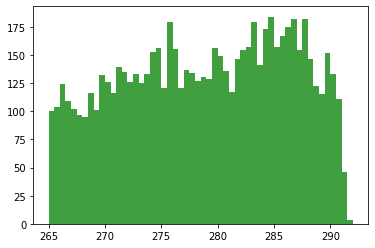

In [40]:
plt.hist(ishi_band13, bins=bins, facecolor='g', alpha=0.75)

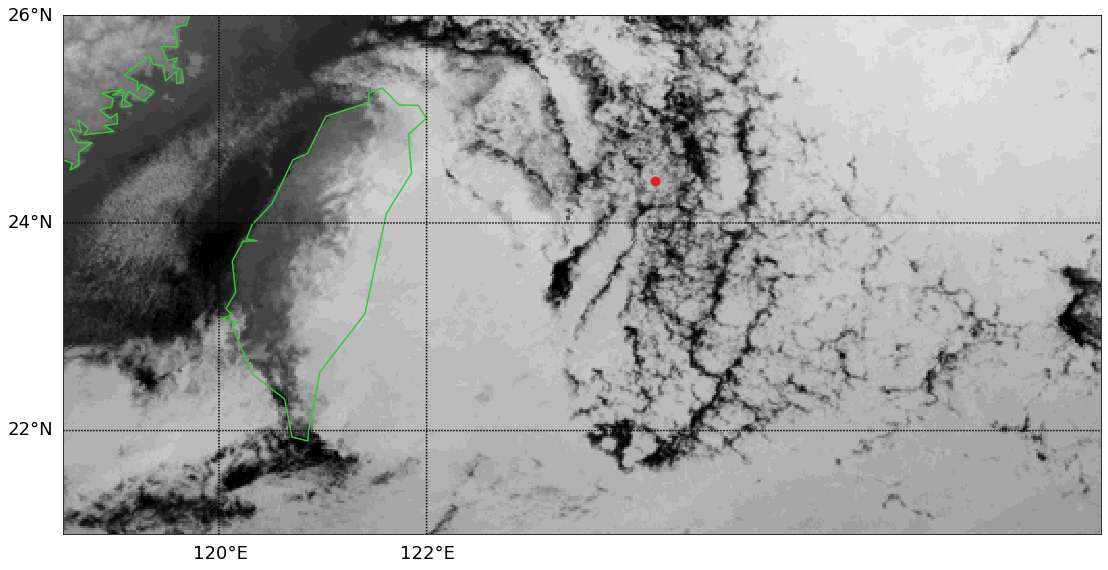

In [462]:
fig = plt.figure(figsize=(16,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=128.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray_r",lut=27)
cmap2.set_under("white")
cmap2.set_over("k")
out1=ma.masked_where(band13>300, band13)
out=ma.masked_where(out1<250, out1)
m.pcolormesh(hi_lon,hi_lat,out,cmap=cmap2,vmin=265,vmax=292)
plt.scatter(124.2,24.4,s=80,c='tab:red',marker='o',zorder=2.5)
plt.tight_layout()

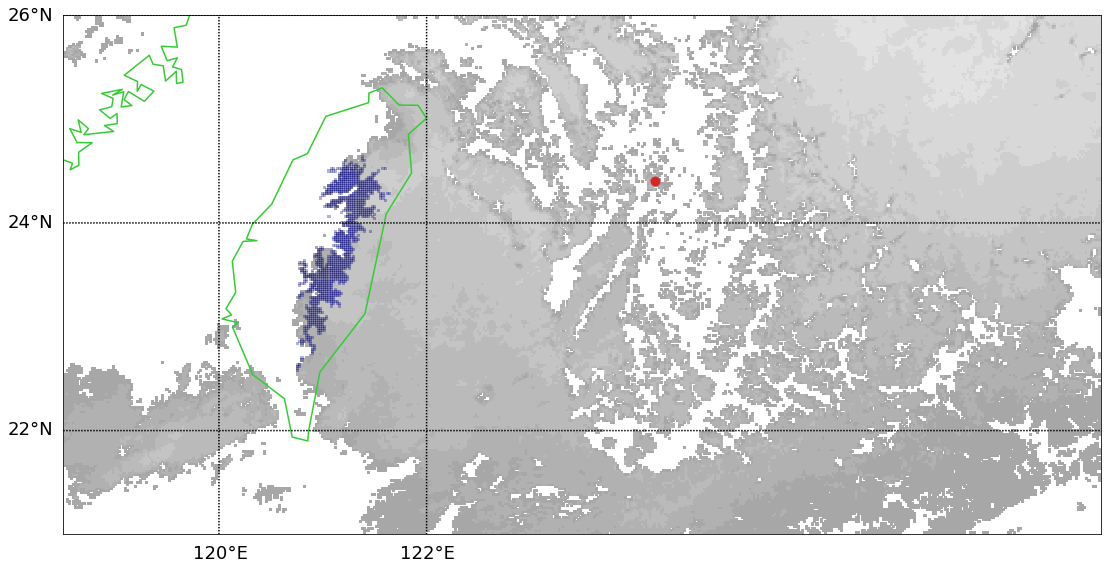

In [463]:
fig = plt.figure(figsize=(16,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=128.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray_r",lut=27)
cmap2.set_under("white")
cmap2.set_over("k")
out1=ma.masked_where(band13>most+3, band13)
out=ma.masked_where(out1<most-6, out1)
m.pcolormesh(hi_lon,hi_lat,out,cmap=cmap2,vmin=265,vmax=292)
plt.scatter(124.2,24.4,s=80,c='tab:red',marker='o',zorder=2.5)

out_t1=ma.masked_where(topo<1900, topo)
m.pcolormesh(local_lon,local_lat,out_t1,cmap='jet',vmin=4000,vmax=6000,alpha=0.3)
plt.tight_layout()

In [466]:
height=1900
hi_bt=most+3
lo_bt=most-6

In [467]:

cloud_mask=fog_filter(tw_band13,topo,height,hi_bt,lo_bt)

(250, 201)


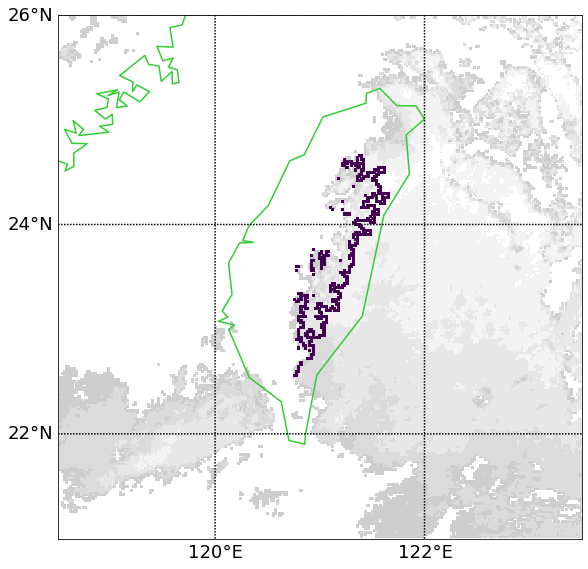

In [468]:

fig = plt.figure(figsize=(16,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

cmap2 = cm.get_cmap("gray_r",lut=22)
cmap2.set_under("white")
cmap2.set_over("k")
out1=ma.masked_where(band13>most+3, band13)
out=ma.masked_where(out1<most-6, out1)
m.pcolormesh(hi_lon,hi_lat,out,cmap=cmap2,vmin=270,vmax=292)

out=ma.masked_where(cloud_mask<0.5, cloud_mask)
m.pcolormesh(local_lon,local_lat,out)
plt.tight_layout()